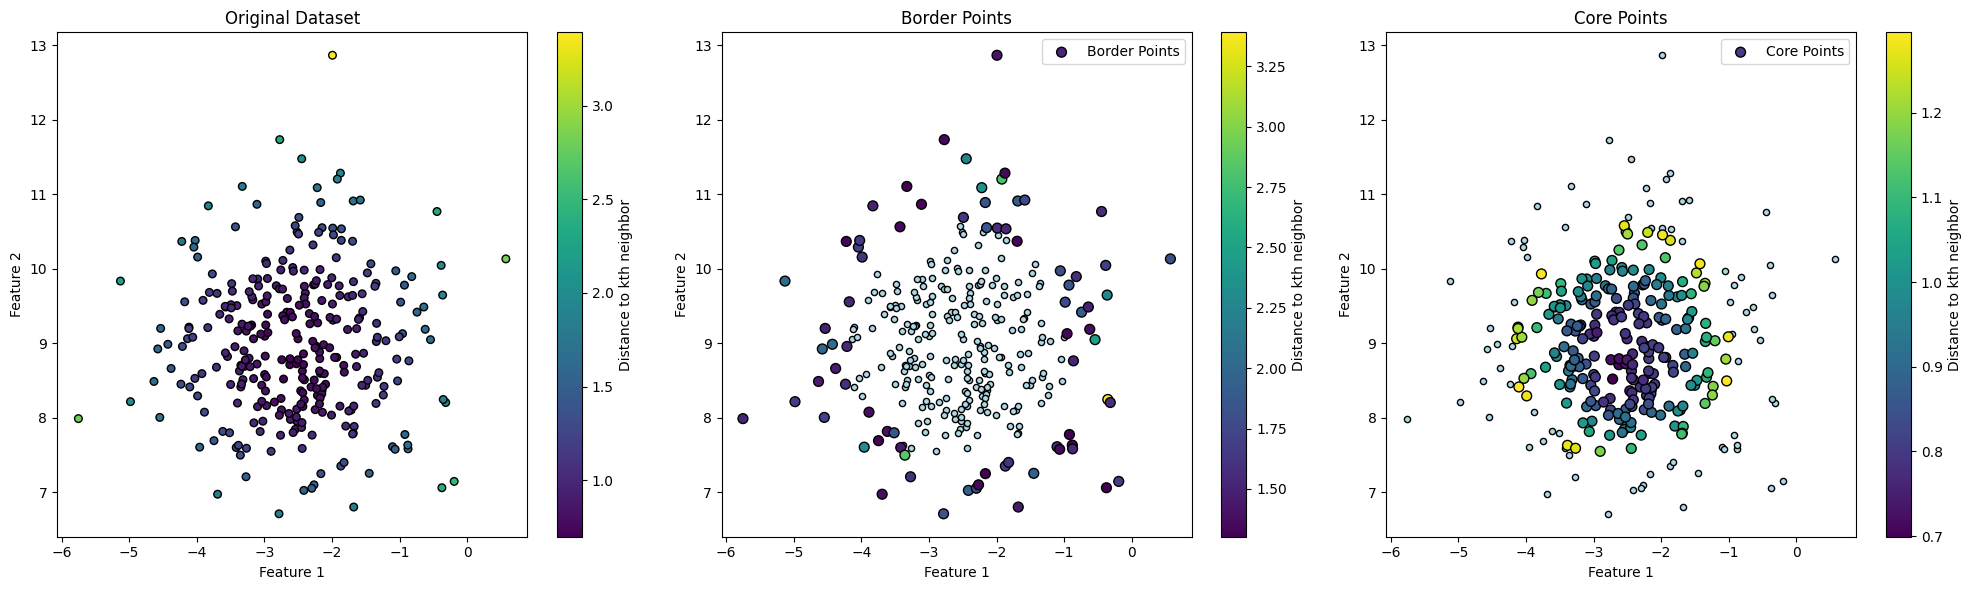

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

# Generate a sample dataset with one class
n_samples = 300
X, _ = make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=1.0, random_state=42)
y = np.zeros(n_samples)  # All points belong to the same class (0)

# Train k-NN classifier
k = 75  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Function to find border points using k-NN classifier and distance threshold
def find_border_points(X, y, knn, class_label, distance_threshold_percentile=75):
    X_class = X[y == class_label]
    border_points = []
    distances = []

    for point in X_class:
        neighbors = knn.kneighbors([point], return_distance=True)
        neighbor_labels = y[neighbors[1][0]]
        max_distance = neighbors[0][0][-1]
        distances.append(max_distance)

    distances = np.array(distances)
    distance_threshold = np.percentile(distances, distance_threshold_percentile)
    distance_border_points = X_class[distances > distance_threshold]

    # Convert border_points to numpy array if not empty
    if len(border_points) > 0:
        border_points = np.array(border_points)
    else:
        border_points = np.empty((0, X.shape[1]))

    return np.unique(np.concatenate((border_points, distance_border_points)), axis=0), distances

# Find border points and distances
class_label = 0  # We only have one class
border_points, distances = find_border_points(X, y, knn, class_label)

# Find core points (points that are not border points)
core_points = X[~np.isin(X, border_points).all(axis=1)]

# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Original dataset
scatter = axs[0].scatter(X[:, 0], X[:, 1], c=distances, cmap='viridis', s=30, edgecolor='k')
axs[0].set_title('Original Dataset')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
fig.colorbar(scatter, ax=axs[0], label='Distance to kth neighbor')

# Plot 2: Border points
axs[1].scatter(X[:, 0], X[:, 1], c='lightblue', s=20, edgecolor='k')
scatter = axs[1].scatter(border_points[:, 0], border_points[:, 1], c=distances[np.isin(X, border_points).all(axis=1)],
                         cmap='viridis', s=50, edgecolor='k', label='Border Points')
axs[1].set_title('Border Points')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')
axs[1].legend()
fig.colorbar(scatter, ax=axs[1], label='Distance to kth neighbor')

# Plot 3: Core points
axs[2].scatter(X[:, 0], X[:, 1], c='lightblue', s=20, edgecolor='k')
scatter = axs[2].scatter(core_points[:, 0], core_points[:, 1], c=distances[np.isin(X, core_points).all(axis=1)],
                         cmap='viridis', s=50, edgecolor='k', label='Core Points')
axs[2].set_title('Core Points')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')
axs[2].legend()
fig.colorbar(scatter, ax=axs[2], label='Distance to kth neighbor')

plt.tight_layout()
plt.show()